In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataset2.csv")
data.columns

Index(['ag+1:629e', 'feeling.nervous', 'panic', 'breathing.rapidly',
       'sweating', 'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')

In [3]:
data.head(5)

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [4]:
data = data.rename(columns={'ag+1:629e':'age'})
data.loc[data['Disorder'] == "anexiety", 'Disorder'] = "Anxiety"
data.loc[data['Disorder'] == "psychotic deprission", 'Disorder'] = "psychotic depression"

In [5]:
Disorder_data = data["Disorder"].unique()
Disorder_data

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'Anxiety', 'PTSD',
       'sleeping disorder', 'psychotic depression', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

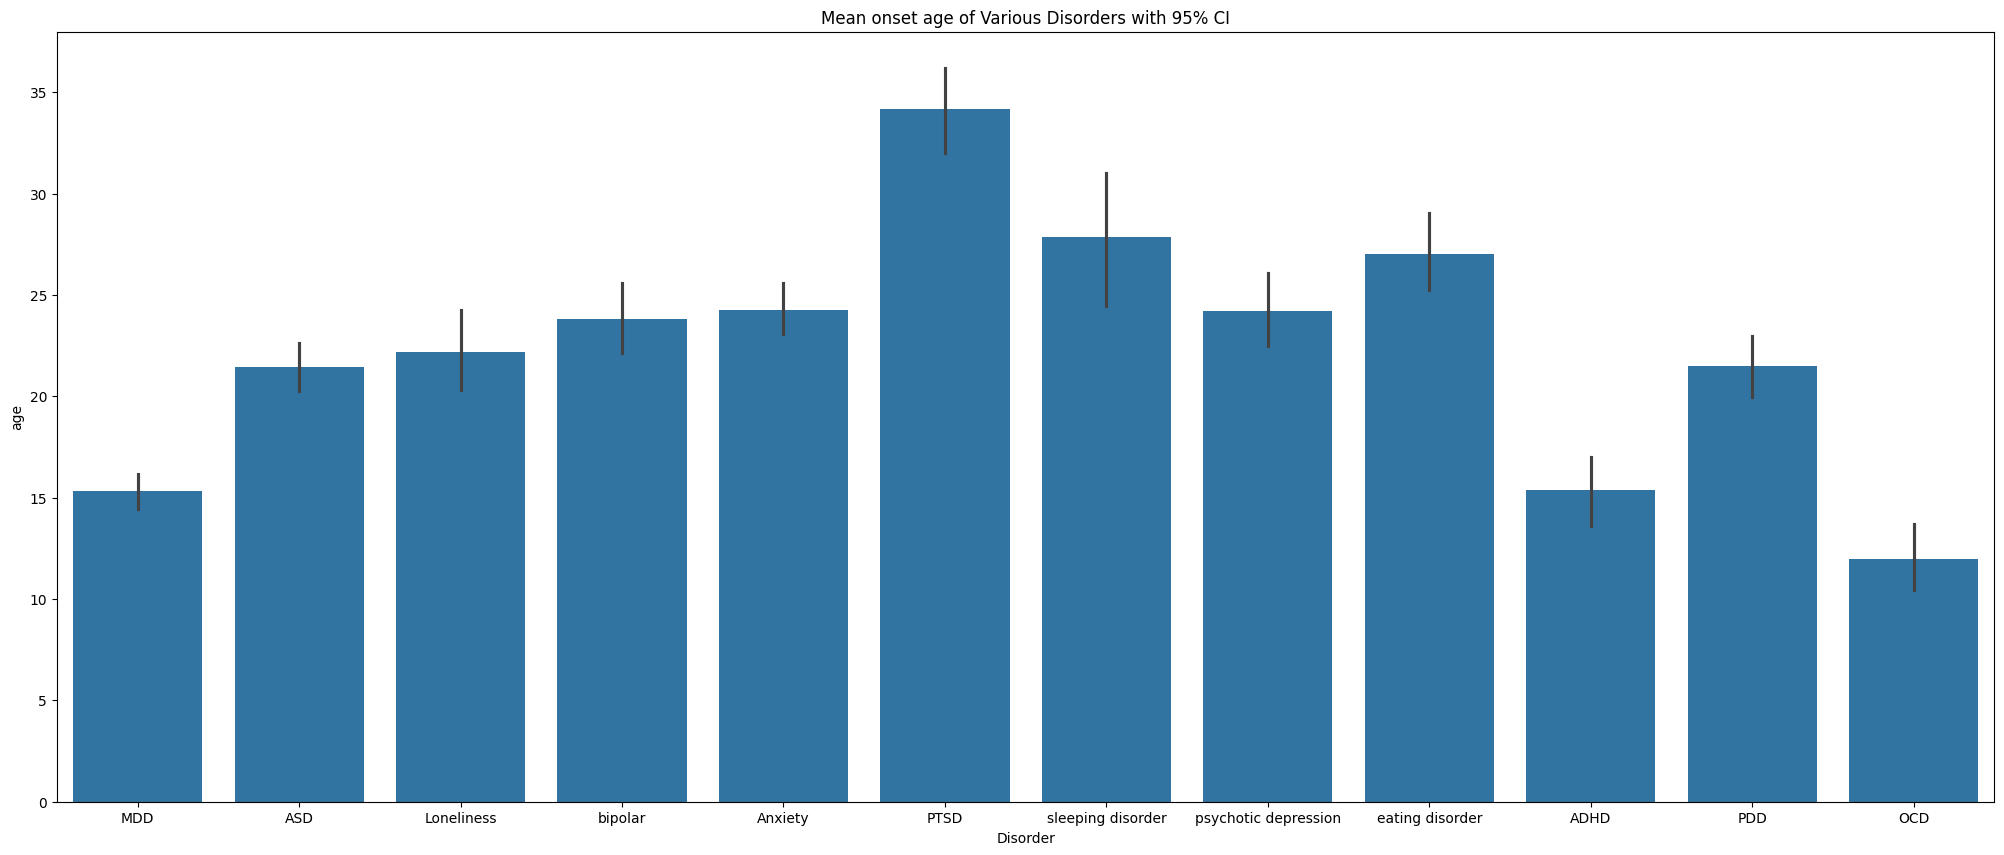

In [6]:
plt.figure(figsize=(25,10))
sns.barplot(data = data, x='Disorder', y='age', estimator=np.mean).set_title('Mean onset age of Various Disorders with 95% CI')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

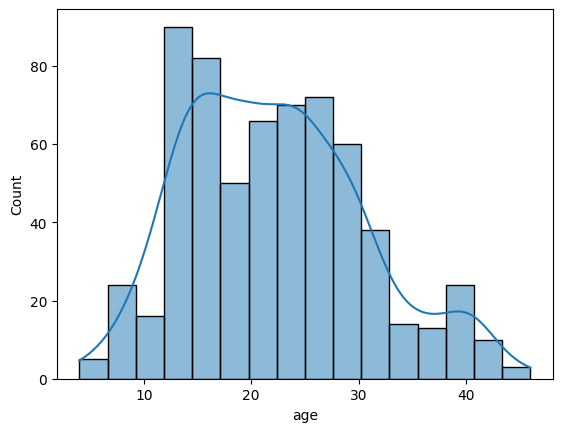

In [7]:
sns.histplot(data.age, kde=True)

<Axes: title={'center': 'Incidences of Various Mental Health Symptoms'}>

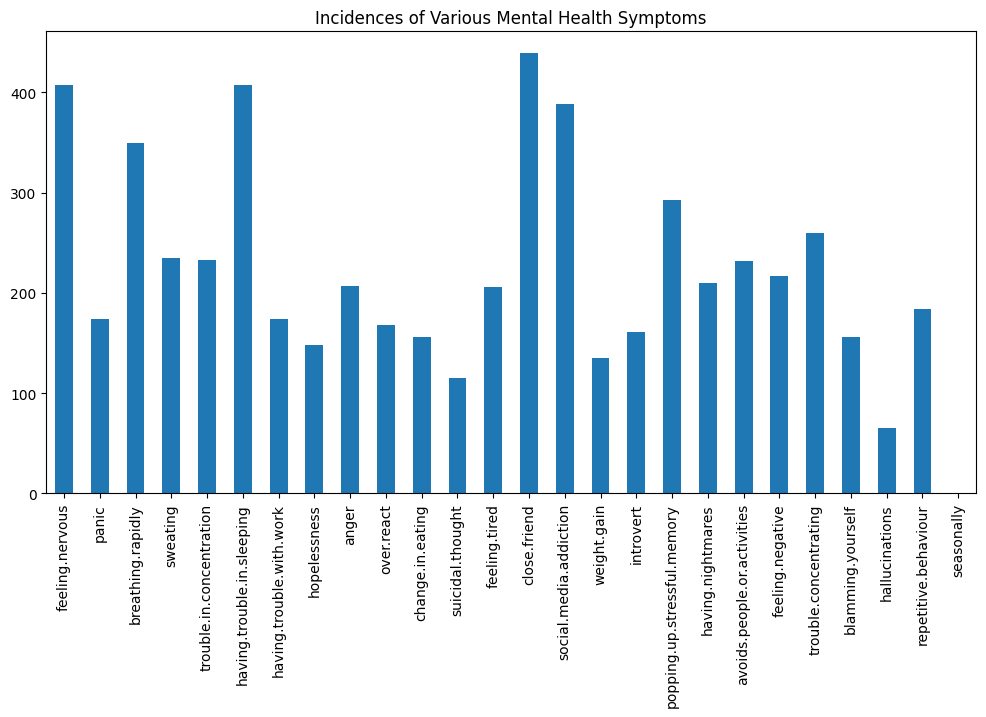

In [8]:
symptom_incidences = data[data.columns[1:27]].sum()
symptom_incidences.plot.bar(figsize=(12,6), title = 'Incidences of Various Mental Health Symptoms')

<Axes: xlabel='Disorder'>

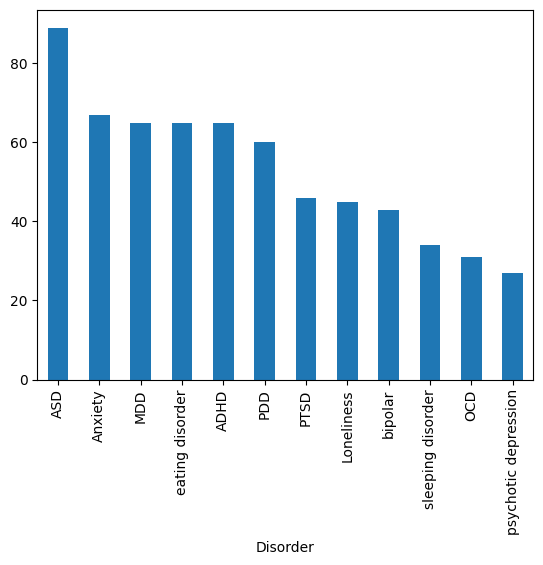

In [9]:
check_disorder = data['Disorder'].value_counts()
check_disorder.plot.bar()

In [10]:
X = data.drop(['Disorder'], axis=1)
y = data.drop([word for word in data.columns if word != "Disorder"], axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [12]:
model1 = SVC()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.4427083333333333
                      precision    recall  f1-score   support

                ADHD       0.59      0.81      0.68        21
                 ASD       1.00      0.46      0.63        48
             Anxiety       1.00      0.25      0.39        53
          Loneliness       0.00      0.00      0.00         0
                 MDD       0.65      0.43      0.52        35
                 OCD       0.00      0.00      0.00         0
                 PDD       0.62      0.56      0.59        18
                PTSD       0.89      0.47      0.62        17
             bipolar       0.00      0.00      0.00         0
     eating disorder       0.00      0.00      0.00         0
psychotic depression       0.00      0.00      0.00         0
   sleeping disorder       0.00      0.00      0.00         0

            accuracy                           0.44       192
           macro avg       0.40      0.25      0.29       192
        weighted avg       0.85      0.44      0.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Progr

In [13]:
print(confusion_matrix(y_test,y_pred))

[[17  9  3  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  4 11  0  2  0  0  1  0  0  0  0]
 [ 0  0  0  0 15  0  8  0  0  0  0  0]
 [ 4  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0 10  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  8  0  0  0  0]
 [ 0  5  4  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  3  0  0  5  0  0  0  0]
 [ 0  7  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0  3  0  0  0  0]]


In [14]:
model = BernoulliNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9479166666666666
                      precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       1.00      1.00      1.00        22
             Anxiety       1.00      1.00      1.00        13
          Loneliness       1.00      1.00      1.00        18
                 MDD       1.00      0.61      0.76        23
                 OCD       1.00      1.00      1.00        11
                 PDD       0.64      1.00      0.78        16
                PTSD       1.00      0.89      0.94         9
             bipolar       1.00      1.00      1.00         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       1.00      1.00      1.00        11
   sleeping disorder       0.86      1.00      0.92         6

            accuracy                           0.95       192
           macro avg       0.96      0.96      0.95       192
        weighted avg       0.97      0.95      0.

In [15]:
print(confusion_matrix(y_test,y_pred))

[[29  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6]]


In [16]:
model2 = GaussianNB()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.96875
                      precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       1.00      1.00      1.00        22
             Anxiety       1.00      1.00      1.00        13
          Loneliness       1.00      1.00      1.00        18
                 MDD       0.74      1.00      0.85        17
                 OCD       1.00      1.00      1.00        11
                 PDD       1.00      0.73      0.84        22
                PTSD       1.00      1.00      1.00         9
             bipolar       1.00      1.00      1.00         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       1.00      1.00      1.00        11
   sleeping disorder       1.00      1.00      1.00         6

            accuracy                           0.97       192
           macro avg       0.98      0.98      0.97       192
        weighted avg       0.98      0.97      0.97       19

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
print(confusion_matrix(y_test,y_pred))

[[29  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6]]


In [18]:
model3 = MultinomialNB()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9479166666666666
                      precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       1.00      1.00      1.00        22
             Anxiety       1.00      1.00      1.00        13
          Loneliness       1.00      1.00      1.00        18
                 MDD       0.61      1.00      0.76        14
                 OCD       1.00      1.00      1.00        11
                 PDD       1.00      0.64      0.78        25
                PTSD       0.89      1.00      0.94         8
             bipolar       1.00      1.00      1.00         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       1.00      1.00      1.00        11
   sleeping disorder       1.00      0.86      0.92         7

            accuracy                           0.95       192
           macro avg       0.96      0.96      0.95       192
        weighted avg       0.97      0.95      0.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


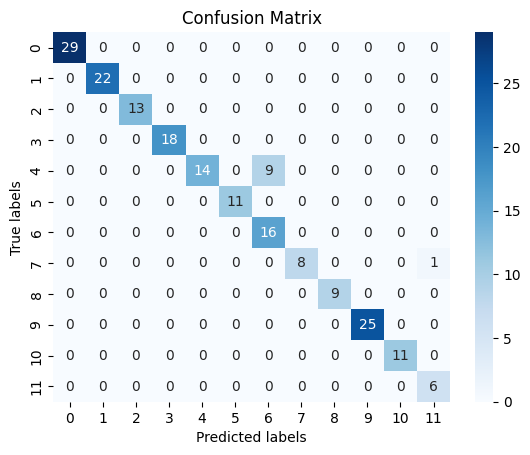

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:

model4 = CategoricalNB()
model4.fit(x_train,y_train)
y_pred = model4.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9479166666666666
                      precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       1.00      1.00      1.00        22
             Anxiety       1.00      1.00      1.00        13
          Loneliness       1.00      1.00      1.00        18
                 MDD       0.61      1.00      0.76        14
                 OCD       1.00      1.00      1.00        11
                 PDD       1.00      0.64      0.78        25
                PTSD       0.89      1.00      0.94         8
             bipolar       1.00      1.00      1.00         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       1.00      1.00      1.00        11
   sleeping disorder       1.00      0.86      0.92         7

            accuracy                           0.95       192
           macro avg       0.96      0.96      0.95       192
        weighted avg       0.97      0.95      0.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print(confusion_matrix(y_test,y_pred))

[[29  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6]]


In [22]:
for label in Disorder_data:
    if label == "OCD":
        data.loc[data['Disorder'] == label, 'Disorder'] = "OCD"
    else:
        data.loc[data['Disorder'] == label, 'Disorder'] = "Not OCD"

In [23]:
X = data.drop(['Disorder'], axis=1)
y = data.drop([word for word in data.columns if word != "Disorder"], axis=1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [25]:
model1 = SVC()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9427083333333334
              precision    recall  f1-score   support

     Not OCD       1.00      0.94      0.97       192
         OCD       0.00      0.00      0.00         0

    accuracy                           0.94       192
   macro avg       0.50      0.47      0.49       192
weighted avg       1.00      0.94      0.97       192



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Progr

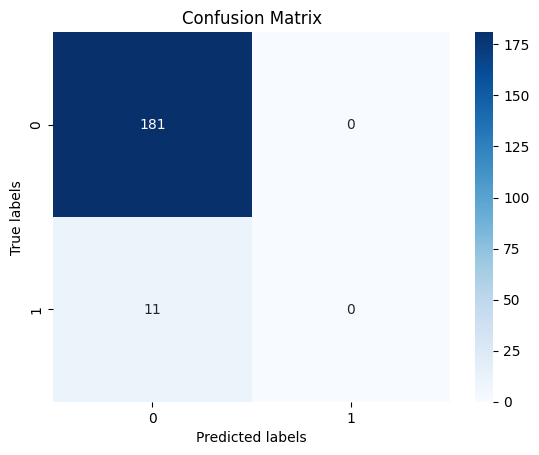

In [26]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
model = BernoulliNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

     Not OCD       1.00      1.00      1.00       181
         OCD       1.00      1.00      1.00        11

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'data' is not defined

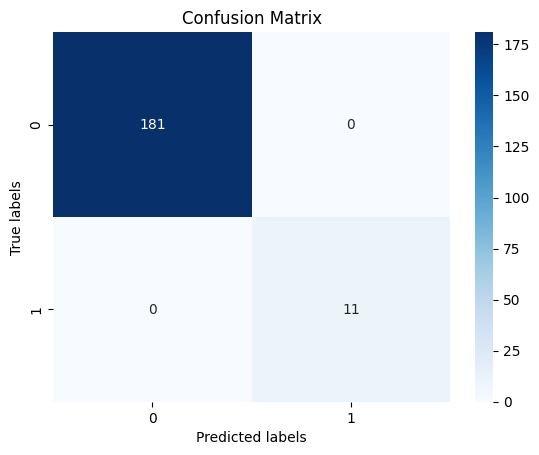

In [28]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
model2 = GaussianNB()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

     Not OCD       1.00      1.00      1.00       181
         OCD       1.00      1.00      1.00        11

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print(confusion_matrix(y_test,y_pred))

[[181   0]
 [  0  11]]


In [31]:
model3 = MultinomialNB()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

     Not OCD       1.00      1.00      1.00       181
         OCD       1.00      1.00      1.00        11

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(confusion_matrix(y_test,y_pred))

[[181   0]
 [  0  11]]


In [33]:

model4 = CategoricalNB()
model4.fit(x_train,y_train)
y_pred = model4.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

     Not OCD       1.00      1.00      1.00       181
         OCD       1.00      1.00      1.00        11

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print(confusion_matrix(y_test,y_pred))

[[181   0]
 [  0  11]]
